### **Requirements**

In [1]:
import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/Project_Stock/'

os.chdir(current_path)

In [ ]:
!pip install pmdarima 

### LOAD OHLCV

In [2]:
def min_max_scaler(x):
    scaled_x = (x - x.min()) / (x.max() - x.min())
    return scaled_x

In [3]:
date_path = './candlestick_concated/30m/2021-02-11/'
file_list = os.listdir(date_path)

print((file_list))

['2021-02-11 BTCUSDT.xlsx', '2021-02-11 ETHUSDT.xlsx', '2021-02-11 BCHUSDT.xlsx', '2021-02-11 XRPUSDT.xlsx', '2021-02-11 EOSUSDT.xlsx', '2021-02-11 LTCUSDT.xlsx', '2021-02-11 ETCUSDT.xlsx', '2021-02-11 LINKUSDT.xlsx', '2021-02-11 XLMUSDT.xlsx', '2021-02-11 ADAUSDT.xlsx', '2021-02-11 XMRUSDT.xlsx', '2021-02-11 SXPUSDT.xlsx', '2021-02-11 KAVAUSDT.xlsx', '2021-02-11 BANDUSDT.xlsx', '2021-02-11 DASHUSDT.xlsx', '2021-02-11 ZECUSDT.xlsx', '2021-02-11 XTZUSDT.xlsx', '2021-02-11 BNBUSDT.xlsx', '2021-02-11 ATOMUSDT.xlsx', '2021-02-11 ONTUSDT.xlsx', '2021-02-11 IOTAUSDT.xlsx', '2021-02-11 BATUSDT.xlsx', '2021-02-11 NEOUSDT.xlsx', '2021-02-11 QTUMUSDT.xlsx', '2021-02-11 WAVESUSDT.xlsx', '2021-02-11 MKRUSDT.xlsx', '2021-02-11 SNXUSDT.xlsx', '2021-02-11 DOTUSDT.xlsx', '2021-02-11 THETAUSDT.xlsx', '2021-02-11 ALGOUSDT.xlsx', '2021-02-11 KNCUSDT.xlsx', '2021-02-11 ZRXUSDT.xlsx', '2021-02-11 COMPUSDT.xlsx', '2021-02-11 OMGUSDT.xlsx']


2021-02-11 BTCUSDT.xlsx
14448
                            open     high      low    close     volume
2020-04-17 00:29:59.999  7019.80  7040.00  7010.00  7023.00   7828.383
2020-04-17 00:59:59.999  7023.00  7064.00  7000.00  7040.85  12396.717
2020-04-17 01:29:59.999  7041.51  7059.00  6958.39  6986.03  13256.941
2020-04-17 01:59:59.999  6986.40  7009.00  6950.00  7002.41  12065.060
2020-04-17 02:29:59.999  7002.41  7023.45  6982.05  7000.39   5898.852
                               close
2020-04-17 00:29:59.999  7023.000000
2020-04-17 00:59:59.999  7027.462500
2020-04-17 01:29:59.999  7017.104375
2020-04-17 01:59:59.999  7013.430781
2020-04-17 02:29:59.999  7010.170586


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log


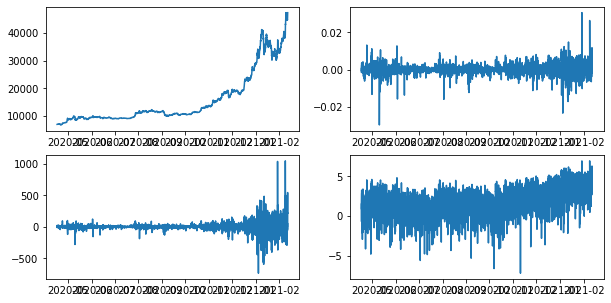

In [4]:
file = file_list[0]
print(file)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ohlcv = pd.read_excel(date_path + file, index_col=0)
print(len(ohlcv))
print(ohlcv.head())

close = ohlcv.iloc[:, [3]]

ema7 = close.ewm(span=7, adjust=False).mean()
print(ema7.head())
# break

target = ema7

# scaled_close = min_max_scaler(close) --> no diffenece



plt.figure(figsize=(10, 5))
plt.subplot(221)
plt.plot(target)

plt.subplot(222)
log_diff = np.log(target)
log_diff = log_diff.dropna()
log_diff = log_diff.diff(periods=1).dropna()
plt.plot(log_diff)
# plt.show()

plt.subplot(223)
diff_target = target.diff(periods=1).dropna()
plt.plot(diff_target)
# plt.show()

plt.subplot(224)
diff_log = np.log(diff_target)
diff_log = diff_log.dropna()
# print(diff_log)
plt.plot(diff_log)
plt.show()

# plt.plot(macd_)
# plt.show()

### ARIMA

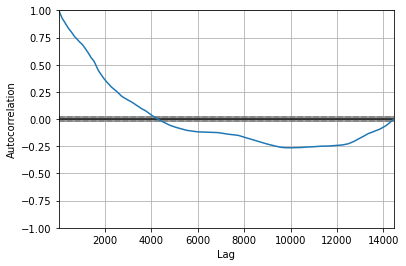

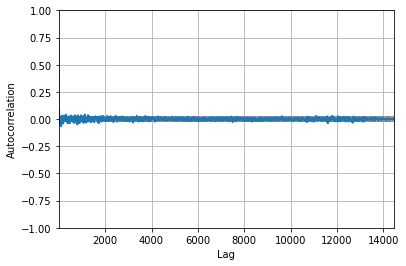

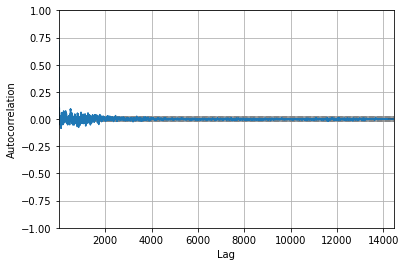

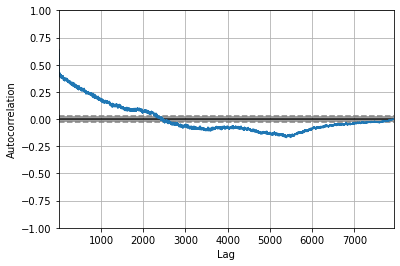

In [5]:
from pandas.plotting import autocorrelation_plot

# plt.figure(figsize=(10, 7), dpi=80)
# plt.subplot(121)
autocorrelation_plot(target)
plt.show()

# autocorrelation_plot(scaled_target)
# plt.show()

autocorrelation_plot(log_diff)
plt.show() 
# plt.subplot(122)
autocorrelation_plot(diff_target)
plt.show() 

autocorrelation_plot(diff_log)
plt.show() 

# autocorrelation_plot(macd_)
# plt.show() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


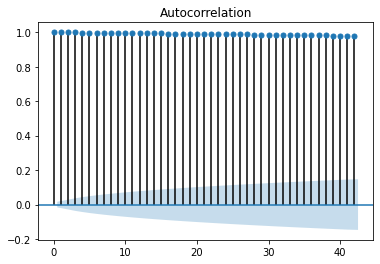

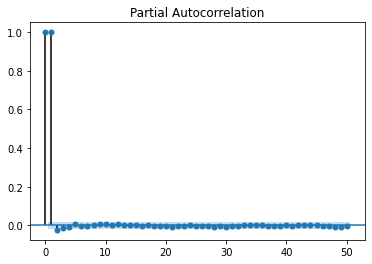

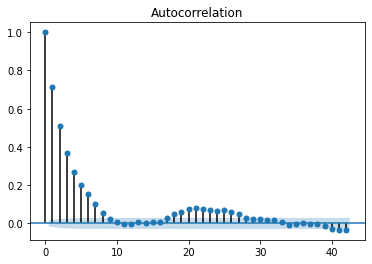

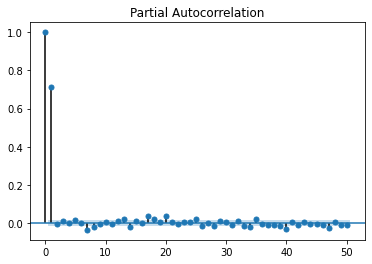

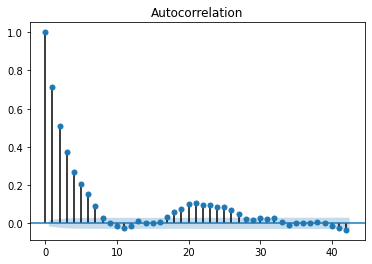

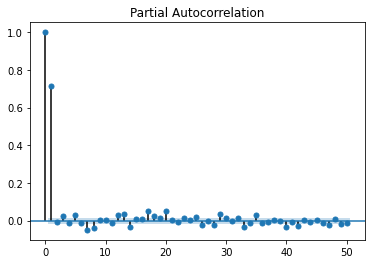

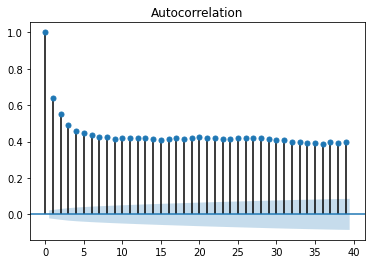

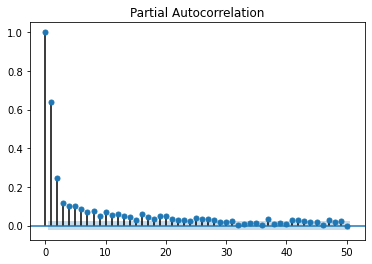

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(target)
plt.show()

plot_pacf(target, lags=50)
plt.show()

# plot_acf(scaled_target)
# plt.show()

# plot_pacf(scaled_target, lags=50)
# plt.show()

plot_acf(log_diff)
plt.show()

plot_pacf(log_diff, lags=50)
plt.show()

plot_acf(diff_target)
plt.show()

plot_pacf(diff_target, lags=50)
plt.show()

plot_acf(diff_log)
plt.show()

plot_pacf(diff_log, lags=50)
plt.show()

# plot_acf(macd_)
# plt.show()

# plot_pacf(macd_, lags=50)
# plt.show()

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(target, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=7.60 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=147521.543, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=147248.014, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=147125.117, Time=0.51 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=2.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=146621.036, Time=1.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=5.23 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=146357.958, Time=3.85 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=11.73 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=145818.400, Time=6.30 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=19.15 sec
 ARIMA(0,2,5)(0,0,0)[0]             : AIC=inf, Time=16.10 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=inf, Time=20.68 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=145820.367, Time=18.38 sec

Best model:  ARIMA(0,2,4)(0,0,0)[0]          
To

In [8]:
import statsmodels
statsmodels.__version__

'0.10.2'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                14446
Model:                 ARIMA(0, 2, 4)   Log Likelihood              -72904.194
Method:                       css-mle   S.D. of innovations             37.625
Date:                Sun, 18 Apr 2021   AIC                         145818.388
Time:                        12:49:04   BIC                         145856.279
Sample:                    04-17-2020   HQIC                        145830.983
                         - 02-11-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.close    -0.2743      0.008    -33.271      0.000      -0.291      -0.258
ma.L2.D2.close    -0.2400      0.008    -28.624      0.000      -0.256      -0.224
ma.L3.D2.close    -0.1736      0.009

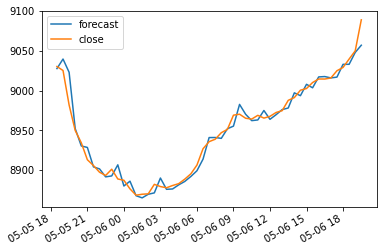

In [11]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.api import SARIMAX

# model = ARIMA(target, order=(0,2,4), trend='n')
# model = ARIMA(target, order=(0,2,4))
model = ARIMA(target, order=(0,2,4))
# model = ARIMA(target, order=(1,0,1), trend='c')
# model = ARIMA(target, order=(2,1,1), trend='t')
model_fit = model.fit(trend='nc')
print(model_fit.summary())
print(model_fit.plot_predict(start=900, end=950))

# model_fit.plot_diagnostics(figsize=(15, 15))

# print(model_fit.plot_predict(start=900, end=950))

# prediction = model_fit.predict(start=900,end=950,dynamic=False)

# plt.plot(target[900:950], label='target')
# plt.plot(prediction, label='prediction')
# plt.legend()
# plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

X = target
size = int(len(X) * 0.66)
train, test = X[0:size].values, X[size:len(X)]
test_shift = test.shift(1).values
test = test.values
# break

history = list(train)
# print(train)
# print(history)
# break
# pred = model_fit.predict()
# print(pred)
# break
# print(len(target), len(pred))
# test_pred = pred[-len(test):]
predictions = list()
err_ranges = list()
for t in range(len(test)):
    # model = ARIMAX(history, order=(2, 1, 2))

    model = ARIMA(history, order=(0, 2, 4))
    model_fit = model.fit()
    
    if t == 0:
      print("model_fit.forecast(steps=10) :", model_fit.forecast(steps=10))

    output = model_fit.forecast()
    # output = model_fit.get_forecast()
    # print(output)
    # break
    # yhat = output.predicted_mean
    predictions.append(output[0])
    err_ranges.append(output[1])
    print(output)

    obs = test[t]
    # print('obs :', obs)
    history.append(obs)
    # break
    print('\r %.2f%%' % (t / len(test) * 100), end='')
    if t > 10:
      break

model_fit.forecast(steps=10) : (array([13699.58616374, 13696.60588514, 13694.19713725, 13691.08320898,
       13687.96878843, 13684.85387562, 13681.73847053, 13678.62257318,
       13675.50618356, 13672.38930167]), array([10.3935303 , 20.57967877, 30.7654886 , 40.30864764, 48.87521731,
       56.9527419 , 64.76396412, 72.43035088, 80.02542717, 87.59686632]), array([[13679.21521868, 13719.95710879],
       [13656.27045595, 13736.94131434],
       [13633.89788763, 13754.49638687],
       [13612.07971133, 13770.08670662],
       [13592.17512277, 13783.76245409],
       [13573.22855267, 13796.47919856],
       [13554.80343335, 13808.67350771],
       [13536.66169407, 13820.5834523 ],
       [13518.65922846, 13832.35313866],
       [13500.70259853, 13844.07600482]]))
(array([13699.58616374]), array([10.3935303]), array([[13679.21521868, 13719.95710879]]))
 0.00%(array([13701.33038841]), array([10.39302334]), array([[13680.96043697, 13721.70033986]]))
 0.02%(array([13712.42242179]), array([1

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

X = target
size = int(len(X) * 0.66)
train, test = X[0:size].values, X[size:len(X)]
test_shift = test.shift(1).values
test = test.values
# break

history = list(train)
# print(train)
# print(history)
# break
# pred = model_fit.predict()
# print(pred)
# print(model_fit.forecast())
# print(len(target), len(pred))
# test_pred = pred[-len(test):]
predictions = list()
err_ranges = list()
for t in range(len(test)):
    # model = ARIMAX(history, order=(2, 1, 2))
    model = ARIMA(history, order=(0, 2, 4))
    model_fit = model.fit()
    # output = model_fit.forecast()
    output = model_fit.get_forecast()
    # print(output)
    # break
    yhat = output.predicted_mean
    predictions.append(yhat)
    err_ranges.append(output.se_mean)
    print(output.se_mean)

    obs = test[t]
    # print('obs :', obs)
    history.append(obs)
    # break
    print('\r %.2f%%' % (t / len(test) * 100), end='')

[10.39341781]
 0.00%[10.39290983]
 0.02%[10.39260407]
 0.04%[10.3931921]
 0.06%[10.39276561]
 0.08%[10.3922263]
 0.10%[10.39176052]
 0.12%

KeyboardInterrupt: ignored

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 123.506


### PREDICTION

In [ ]:
# pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
# pred_ci = pred.conf_int()
# model_fit.get_prediction()

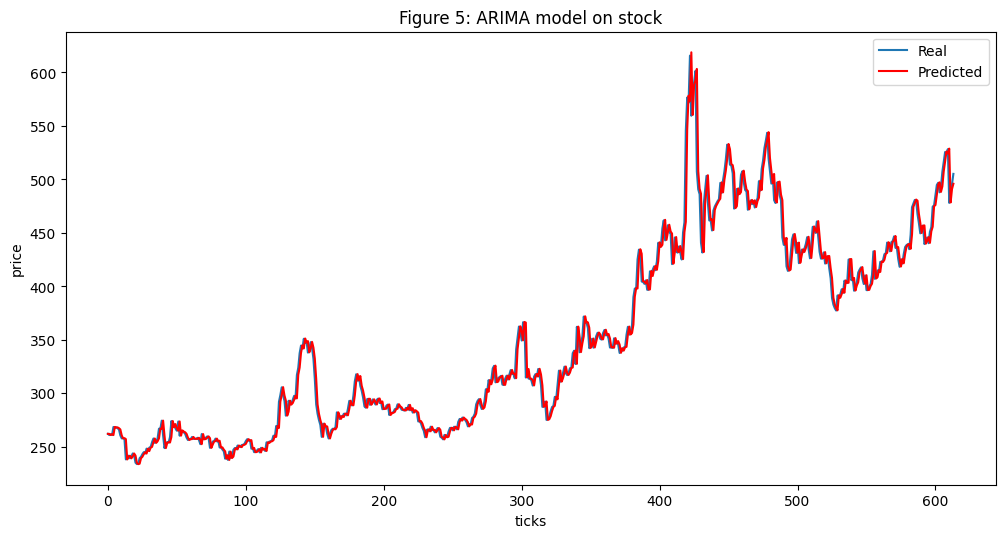

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('ticks')
plt.ylabel('price')
plt.title('Figure 5: ARIMA model on stock')
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=(12, 6), dpi=100)
# # plt.plot(test[:100], label='Real')
# plt.plot(test_shift[:100], label='Shift')
# plt.plot(predictions[:100], color='red', label='Predicted')
# plt.xlabel('ticks')
# plt.ylabel('price')
# plt.title('Figure 5: ARIMA model on stock')
# plt.legend()
# plt.show()

In [ ]:
import numpy as np
# plt.plot(test_shift[:100], label='Shift')
# plt.plot(predictions[:100], color='red', label='Predicted')
print(np.hstack((test_shift[:5], predictions[:5])))

[[         nan 262.16252564]
 [262.14       262.16056984]
 [261.04       261.05765582]
 [261.83       261.84874815]
 [261.02       261.03737709]]


### **Back-Test**

614 614


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


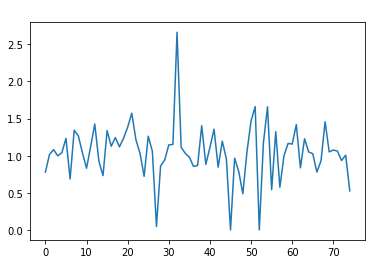

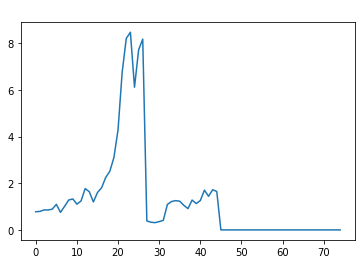

(0.6133333333333333, 0.12214983713355049, array([0.]))

In [ ]:
print(len(test), len(predictions))

high, low = np.split(ohlcv.values[-len(test):, [1, 2]], 2, axis=1)
# print(high)


def get_back_result(tp=0.04, leverage=1, show_detail=False, show_plot=False):

  fee = 0.0006
  profits = list()
  win_cnt = 0
  for i in range(len(test)):

    long_ep = (predictions[i] - err_ranges[i]) * (1 / (tp + 1))
    short_ep = (predictions[i] + err_ranges[i]) * (1 / (1 - tp))
    # print((low[i]))
    if low[i] < long_ep:
      profit = test[i] / long_ep - fee
      l_profit = 1 + (profit - 1) * leverage
      l_profit = max(l_profit, 0)
      profits.append(l_profit)
      if show_detail:
        print(test[i], predictions[i], long_ep)

      if profit >= 1:
        win_cnt += 1

    elif high[i] > short_ep:
      profit = short_ep / test[i] - fee
      l_profit = 1 + (profit - 1) * leverage
      l_profit = max(l_profit, 0)
      profits.append(l_profit)
      if show_detail:
        print(test[i], predictions[i], short_ep)
        
      if profit >= 1:
        win_cnt += 1

  win_ratio = win_cnt / len(profits)
  frequency = len(profits) / len(test)
  accum_profit = np.array(profits).cumprod()

  # print(win_ratio)

  if show_plot:
    plt.plot(profits)
    plt.title('Win Ratio : %.2f %% Frequency : %.2f %%' % (win_ratio * 100, frequency * 100), color='white')
    plt.show()

    # print()
    plt.plot(accum_profit)
    plt.title('Accum_profit : %.2f' % accum_profit[-1], color='white')
    plt.show()

  return win_ratio, frequency, accum_profit[-1]


get_back_result(tp=0.04, leverage=10, show_plot=True)


### **Back-Test Analyze**

#### by tp

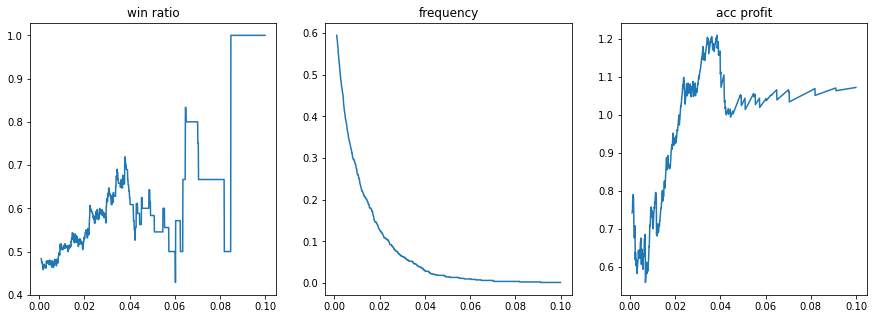

In [ ]:
tp_list = np.arange(0.001, 0.1, 0.0001)
wr_list, fr_list, ap_list = list(), list(), list()
for tp in tp_list:

  try:
    result = get_back_result(tp=tp)
    wr_list.append(result[0])
    fr_list.append(result[1])
    ap_list.append(result[2])

  except Exception as e:
    print(e)
    break

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(tp_list[:len(ap_list)], wr_list)
plt.title('win ratio')

plt.subplot(132)
plt.plot(tp_list[:len(ap_list)], fr_list)
plt.title('frequency')

plt.subplot(133)
plt.plot(tp_list[:len(ap_list)], ap_list)
plt.title('acc profit')

plt.show()

#### by leverage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


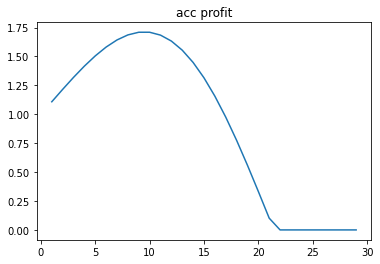

In [ ]:
leverage_list = np.arange(1, 30, 1)
wr_list, fr_list, ap_list = list(), list(), list()
for leverage in leverage_list:

  try:
    result = get_back_result(tp=0.04, leverage=leverage)
    wr_list.append(result[0])
    fr_list.append(result[1])
    ap_list.append(result[2])

  except Exception as e:
    print(e)
    break

plt.plot(leverage_list[:len(ap_list)], ap_list)
plt.title('acc profit')

plt.show()

824


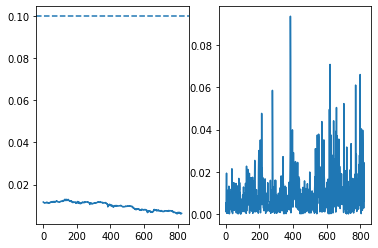

In [ ]:
errors = np.array(err_ranges) / np.array(test)
real_errors = abs(np.array(test - predictions) / np.array(test))

# print((test - predictions)[:5])
print(len(errors))
plt.subplot(121)
plt.axhline(tp, linestyle='--')
plt.plot(errors)

plt.subplot(122)
plt.plot(real_errors)
plt.show()

### **ARIMA on Profit**

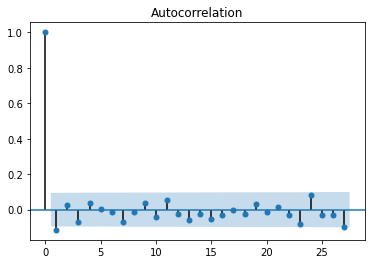

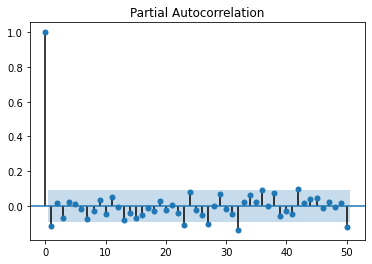

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(np.array(profits))
plt.show()

plot_pacf(np.array(profits), lags=50)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  434
Model:                     ARMA(4, 1)   Log Likelihood                1293.012
Method:                       css-mle   S.D. of innovations              0.012
Date:                Thu, 11 Feb 2021   AIC                          -2572.025
Time:                        01:39:59   BIC                          -2543.513
Sample:                             0   HQIC                         -2560.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.001   1930.007      0.000       0.999       1.001
ar.L1.y        0.0254      0.895      0.028      0.977      -1.730       1.781
ar.L2.y        0.0224      0.111      0.203      0.8

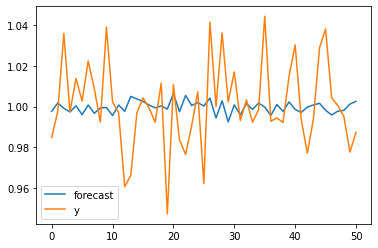

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(profits, order=(4, 0, 1))
model_fit = model.fit(trend='c', disp=5)
print(model_fit.summary())
# print(model_fit.plot_predict())
print(model_fit.plot_predict(start=50, end=100))
